In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
def load_data(data_path):
    """
    Method given with the assignment
    """
    FEATURES = range(2, 33)
    N_TIME_SERIES = 3500

    # Create the training and testing samples
    LS_path = os.path.join(data_path, 'LS')
    TS_path = os.path.join(data_path, 'TS')
    X_train, X_test = [np.zeros((N_TIME_SERIES, (len(FEATURES) * 512))) for i in range(2)]

    for f in FEATURES:
        print("Loading feature {}...".format(f))
        data = np.loadtxt(os.path.join(LS_path, 'LS_sensor_{}.txt'.format(f)))
        X_train[:, (f-2)*512:(f-2+1)*512] = data
        data = np.loadtxt(os.path.join(TS_path, 'TS_sensor_{}.txt'.format(f)))
        X_test[:, (f-2)*512:(f-2+1)*512] = data
    
    y_train = np.loadtxt(os.path.join(LS_path, 'activity_Id.txt'))

    print('X_train size: {}.'.format(X_train.shape))
    print('y_train size: {}.'.format(y_train.shape))
    print('X_test size: {}.'.format(X_test.shape))

    return X_train, y_train, X_test

In [3]:
def write_submission(y, where, submission_name='toy_submission.csv'):

    os.makedirs(where, exist_ok=True)

    SUBMISSION_PATH = os.path.join(where, submission_name)
    if os.path.exists(SUBMISSION_PATH):
        os.remove(SUBMISSION_PATH)

    y = y.astype(int)
    outputs = np.unique(y)

    # Verify conditions on the predictions
    if np.max(outputs) > 14:
        raise ValueError('Class {} does not exist.'.format(np.max(outputs)))
    if np.min(outputs) < 1:
        raise ValueError('Class {} does not exist.'.format(np.min(outputs)))
    
    # Write submission file
    with open(SUBMISSION_PATH, 'a') as file:
        n_samples = len(y)
        if n_samples != 3500:
            raise ValueError('Check the number of predicted values.')

        file.write('Id,Prediction\n')

        for n, i in enumerate(y):
            file.write('{},{}\n'.format(n+1, int(i)))

    print('Submission {} saved in {}.'.format(submission_name, SUBMISSION_PATH))


In [4]:
X_train, y_train, X_test = load_data('data')

Loading feature 2...
Loading feature 3...
Loading feature 4...
Loading feature 5...
Loading feature 6...
Loading feature 7...
Loading feature 8...
Loading feature 9...
Loading feature 10...
Loading feature 11...
Loading feature 12...
Loading feature 13...
Loading feature 14...
Loading feature 15...
Loading feature 16...
Loading feature 17...
Loading feature 18...
Loading feature 19...
Loading feature 20...
Loading feature 21...
Loading feature 22...
Loading feature 23...
Loading feature 24...
Loading feature 25...
Loading feature 26...
Loading feature 27...
Loading feature 28...
Loading feature 29...
Loading feature 30...
Loading feature 31...
Loading feature 32...
X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


First test with a random forest composed of 10 estimators and min_sample_split=200

In [5]:
forest = RandomForestClassifier(n_estimators=10, min_samples_split=200, n_jobs=-1, random_state=0)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.74571429 0.75428571 0.77428571 0.76571429 0.69428571 0.72857143
 0.72571429 0.68857143 0.72285714 0.75428571]
0.7354285714285714


Second test with a random forest composed of 50 estimators and min_sample_split=200

In [6]:
forest = RandomForestClassifier(n_estimators=50, min_samples_split=200, n_jobs=-1, random_state=0)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.76285714 0.77714286 0.79428571 0.79142857 0.74857143 0.76857143
 0.77714286 0.75142857 0.75714286 0.77428571]
0.7702857142857142


Third test with a random forest composed of 50 estimators and min_sample_split=100

In [7]:
forest = RandomForestClassifier(n_estimators=50, min_samples_split=100, n_jobs=-1, random_state=0)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.85428571 0.87428571 0.87142857 0.88285714 0.86857143 0.83714286
 0.86       0.85428571 0.85714286 0.84857143]
0.8608571428571429


Fourth test with a random forest composed of 100 estimators and min_sample_split=50

In [8]:
forest = RandomForestClassifier(n_estimators=100, min_samples_split=50, n_jobs=-1, random_state=0)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.90571429 0.90571429 0.90857143 0.93142857 0.92       0.88285714
 0.91142857 0.88857143 0.90285714 0.90571429]
0.9062857142857143


Study the accuracy of the forest based on the number of trees (min_sample_split = 25)

Working on 1...
Working on 10...
Working on 20...
Working on 30...
Working on 40...
Working on 50...
Working on 60...
Working on 70...
Working on 80...
Working on 90...
Working on 100...
Working on 110...
Working on 120...
Working on 130...
Working on 140...
Working on 150...
Working on 160...
Working on 170...
Working on 180...
Working on 190...
Working on 200...


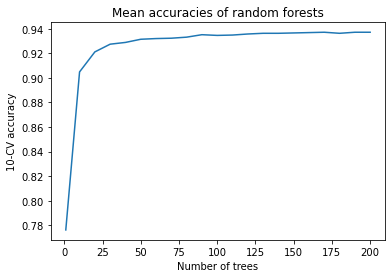

In [10]:
forest_sizes = [1]
accuracies = []
for i in range(10, 201, 10):
    forest_sizes.append(i)
for size in forest_sizes:
    print("Working on {}...".format(size))
    forest = RandomForestClassifier(n_estimators=size, min_samples_split=25, n_jobs=-1, random_state=0)
    scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(forest_sizes, accuracies)
plt.title("Mean accuracies of random forests")
plt.xlabel("Number of trees")
plt.ylabel("10-CV accuracy")
plt.savefig("rf_basic_accuracies.png")
plt.show()

We can see on this graph that for number of trees greater or equal to 30, we reach a plateau. Let us set the number of trees to 40 and study the accuracy depending on the value of min_sample_split.

Working on 2...
Working on 5...
Working on 10...
Working on 20...
Working on 30...
Working on 40...
Working on 50...
Working on 60...
Working on 70...
Working on 80...
Working on 90...
Working on 100...


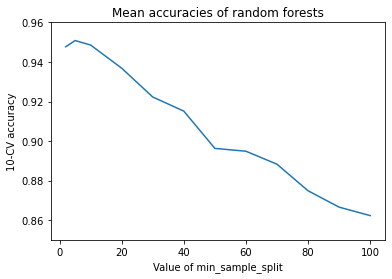

In [13]:
mss = [2, 5]
accuracies = []
for i in range (10, 101, 10):
    mss.append(i)
for value in mss:
    print("Working on {}...".format(value))
    forest = RandomForestClassifier(n_estimators=40, min_samples_split=value, n_jobs=-1, random_state=0)
    scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(mss, accuracies)
plt.title("Mean accuracies of random forests")
plt.xlabel("Value of min_sample_split")
plt.ylabel("10-CV accuracy")
plt.ylim((0.85, 0.96))
plt.savefig("rf_40_accuracies.png")
plt.show()

Based on the previous graph, compute the mean accuracy with 10-CV for a random forest of 40 trees and min_sample_split=25

In [14]:
forest = RandomForestClassifier(n_estimators=40, min_samples_split=25, n_jobs=-1, random_state=0)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.93714286 0.92571429 0.92571429 0.95428571 0.93428571 0.91142857
 0.92857143 0.91714286 0.92857143 0.92571429]
0.9288571428571428
